<a href="https://colab.research.google.com/github/NBK-code/ML_Algorithms/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

In [1]:
import random
import matplotlib.pyplot as plt
import math

In [2]:
def logistic_regression(x, y, epochs = 10, learning_rate = 0.001):

  n = len(x) # no of data points
  m = len(x[0]) #no of features

  b0, bs = initialize_params(m)

  for i in range(epochs):

    loss, d_bo, d_bs = compute_gradients(x, y, b0, bs, n, m)
    print("Epoch:", i+1, "  loss:", loss)
    b0, bs = update_params(b0, bs, d_bo, d_bs, learning_rate)

  return b0, bs

In [3]:
def initialize_params(m):
  b0 = random.random()
  bs = [random.random() for _ in range(m)]
  return b0, bs

In [4]:
def compute_gradients(x, y, b0, bs, n, m):
  loss = 0
  d_b0 = 0
  d_bs = []
  y_hat_list = []

  for i in range(n):
    z = b0
    for j in range(m):
      z += bs[j]*x[i][j]
    y_hat = logistic_fun(z)
    y_hat_list.append(y_hat)

  for i in range(n):
    loss += (1/n)*binary_loss(y[i], y_hat_list[i])

  for i in range(n):
    d_b0 -= (1/n)*(y[i] - y_hat_list[i])

  for j in range(m):
    d_bs_j = 0
    for i in range(n):
      d_bs_j -= (1/n)*(y[i] - y_hat_list[i])*x[i][j]
    d_bs.append(d_bs_j)

  return loss, d_b0, d_bs

In [5]:
def logistic_fun(z):
  y_hat = 1/(1+math.exp(-z))
  return y_hat

In [6]:
def binary_loss(y, y_hat):
  loss = -y*math.log(y_hat)-(1-y)*math.log(1-y_hat)
  return loss

In [7]:
def update_params(b0, bs, d_bo, d_bs, learning_rate):
  b0 = b0 - learning_rate*d_bo

  for i in range(len(bs)):
    bs[i] = bs[i] - learning_rate*d_bs[i]

  return b0, bs

Run on sample data

In [8]:
x = [(1,2),(1,2),(2,3),(2,2),(3,4),(3,3),(1,4),(8,7),(8,8),(7,8),(9,9),(9,8),(10,10),(8,10)]

In [9]:
y = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [10]:
b0, bs = logistic_regression(x, y, epochs = 40, learning_rate = 0.01)

Epoch: 1   loss: 2.019472584975773
Epoch: 2   loss: 1.7102836887877904
Epoch: 3   loss: 1.4223812085969916
Epoch: 4   loss: 1.1661026861917665
Epoch: 5   loss: 0.9528731757014107
Epoch: 6   loss: 0.789962531642466
Epoch: 7   loss: 0.6754550052841118
Epoch: 8   loss: 0.599444779615374
Epoch: 9   loss: 0.5500617327758875
Epoch: 10   loss: 0.5177830941728616
Epoch: 11   loss: 0.49624534881474003
Epoch: 12   loss: 0.48149488800288465
Epoch: 13   loss: 0.47111558922582203
Epoch: 14   loss: 0.4636166347084534
Epoch: 15   loss: 0.45805936868244734
Epoch: 16   loss: 0.45383882023543354
Epoch: 17   loss: 0.45055594027633655
Epoch: 18   loss: 0.44794176440301486
Epoch: 19   loss: 0.445811431815369
Epoch: 20   loss: 0.44403565582507365
Epoch: 21   loss: 0.44252261377711183
Epoch: 22   loss: 0.4412061995861519
Epoch: 23   loss: 0.4400382490203666
Epoch: 24   loss: 0.43898329871039565
Epoch: 25   loss: 0.43801499351134543
Epoch: 26   loss: 0.43711358612461854
Epoch: 27   loss: 0.43626417284504065
E

In [11]:
x_data = []
y_data = []
for p1,p2 in x:
  x_data.append(p1)
  y_data.append(p2)

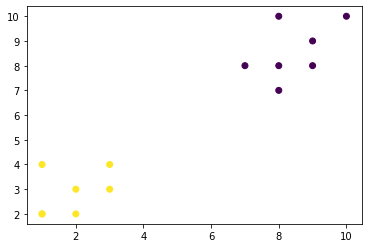

In [12]:
plt.scatter(x_data, y_data, c = y)
plt.show()

Inference

In [13]:
def inference(x, b0, bs):
  for i in range(len(x)):
    z = b0
    for j in range(len(x[0])):
      z += bs[j]*x[i][j]
    y_hat = logistic_fun(z)
  return y_hat

In [14]:
x_text = [(1,1)]
inference(x_text, b0, bs)

0.6368060119289827

In [15]:
x_text = [(3.0,3.0)]
inference(x_text, b0, bs)

0.487695845781273

In [16]:
x_text = [(6,6)]
inference(x_text, b0, bs)

0.2758066455989881